In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet

plt.style.use('bmh')

In [2]:
data = pd.read_csv('../ts_data/example_wp_log_peyton_manning.csv', parse_dates=['ds'])
data 

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [3]:
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

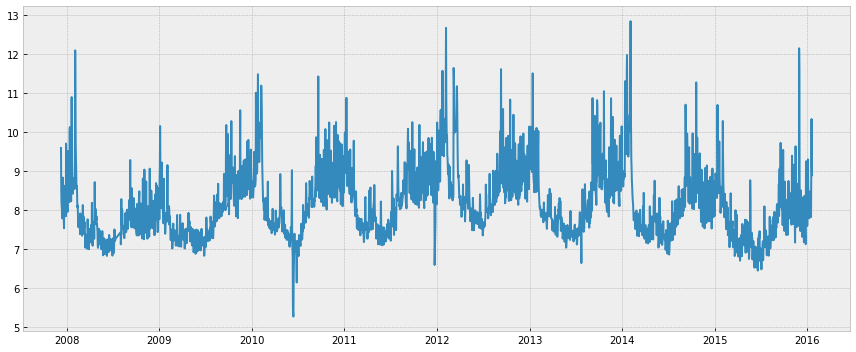

In [4]:
plt.figure(figsize=(12,5))
plt.plot(data.ds, data.y)
plt.tight_layout()
plt.show()

In [5]:
m = Prophet()
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.41    0.00109841       326.358      0.7019      0.7019      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7990.03    0.00870456       663.895      0.4236      0.4236      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7994.7    0.00088867       189.435       2.393      0.2393      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7999.23   0.000490727       311.727       0.255           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     431       8000.37   3.72506e-05       109.303   1.977e-07       0.001      577  LS failed, Hessian reset 
     499       8001.34    0.00358046    

In [6]:
future = m.make_future_dataframe(periods=365)
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [7]:
future.dtypes

ds    datetime64[ns]
dtype: object

In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.845957,8.230626,9.487307
1,2007-12-11,8.594475,7.984878,9.232650
2,2007-12-12,8.390266,7.751804,9.003819
3,2007-12-13,8.368155,7.744089,8.990915
4,2007-12-14,8.356095,7.737173,8.916947
...,...,...,...,...
3265,2017-01-15,8.204125,7.468533,8.906137
3266,2017-01-16,8.529148,7.772012,9.212848
3267,2017-01-17,8.316555,7.589309,9.021939
3268,2017-01-18,8.149153,7.374571,8.878536


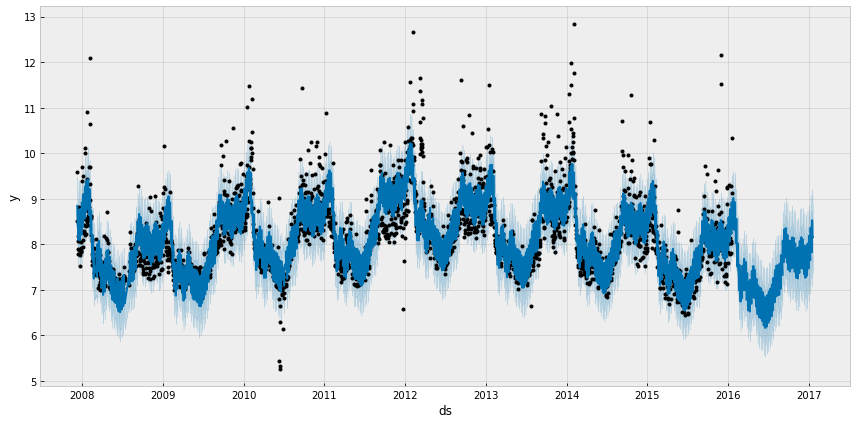

In [9]:
m.plot(forecast, figsize=(12,6))
plt.tight_layout()
plt.show()

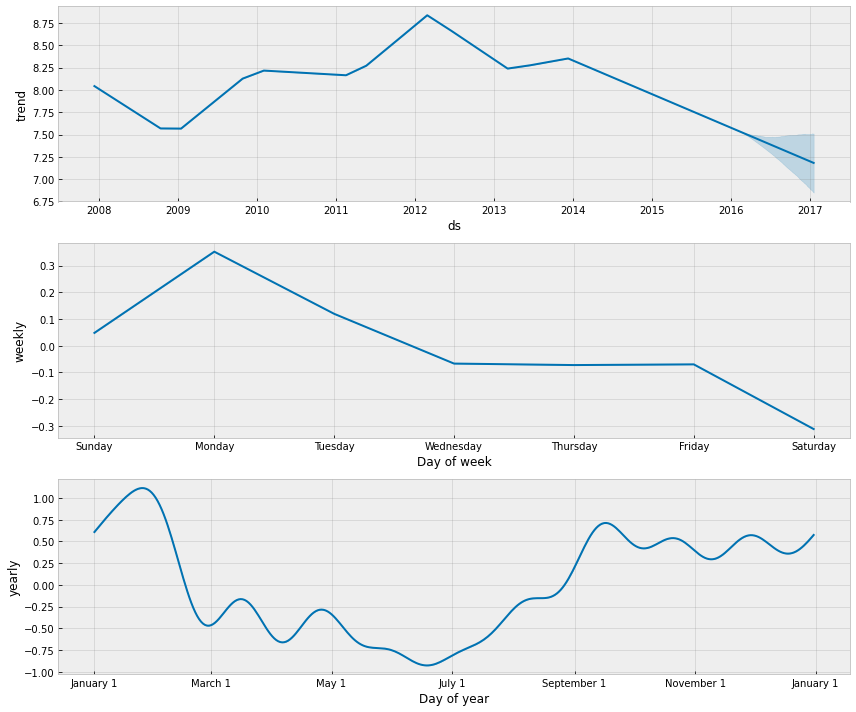

In [10]:
m.plot_components(forecast, figsize=(12,10))
plt.tight_layout()
plt.show()